In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
file = '/home/ck/DIR/cornkle/data/NFLICS/cell_stats14.2_n18_15.2_n16_Unique_msg9_cell_mean_cellthresh_n70_cellpixlt_n70_freq_mean_00000_refhours_18_21.csv' 

In [4]:
tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [5]:
test= tab[tab.time==tab.time[0]]
test.com_lon.values

array([26.])

In [6]:
tab

,time,com_lon,com_lat,cell_min_T,cell_mean_T,cell_area_km2
0,2004-08-07 20:00:00,26.0,235.0,-83.0,-74.0,8067.97
1,2005-08-19 18:00:00,19.0,232.0,-79.0,-74.0,18732.42
2,2005-08-29 20:00:00,11.0,240.0,-84.0,-74.0,16755.44
3,2006-07-24 19:00:00,28.0,224.0,-86.0,-76.0,6564.46
4,2006-07-26 18:00:00,13.0,253.0,-84.0,-75.0,12379.89
5,2006-08-12 18:00:00,21.0,252.0,-80.0,-74.0,10431.65
6,2006-09-07 18:00:00,28.0,224.0,-78.0,-74.0,8965.96
7,2007-07-17 18:00:00,24.0,244.0,-87.0,-76.0,9453.58
8,2007-07-25 18:00:00,30.0,234.0,-83.0,-74.0,13388.85
9,2007-08-02 21:00:00,28.0,237.0,-80.0,-74.0,13366.93


In [7]:
pd.to_datetime(tab.time.values[0]).month

8

In [8]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [9]:
def run(shift):

    kernel2_list = []
    kernel3_list = []
    cnt_list = []


    for date in tab.time:


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
        
        #ipdb.set_trace()
        fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)

        try:

            lsta = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + fdate + '.nc') #sma  #'AMSR_L3_LPRMv05_A_'

        except:
            try:
                lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + fdate + '.nc')
                print('AMSR night')
            except:
                continue

        testbox = lsta['SM'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values

        if np.isnan(testbox).all():
            try:
                lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + fdate + '.nc') 
                print('AMSR night')
            except:
                print('AMSR night fail')
                continue

            testbox = lsta['SM'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values
            print('AMSR night')
            if np.isnan(testbox).all():
                print('AMSR night fail')
                continue

        lsta = lsta.sel(lon=slice(-19, -10), lat=slice(12, 17))    
        lsta = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day))



        lsta_da = lsta['SM'].squeeze()
    #     booleans = np.zeros_like(lsta_da.values) * np.nan
    #     booleans[lsta_da.values>4] = 1
    #     booleans[lsta_da.values<-4] = -1

        #lsta_da.values = booleans


    #     point = lsta_da.sel(lat=single.com_lat.values, lon=single.com_lon.values, method='nearest')
    #     if np.isnan(point.values):
    #         continue



        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')
    #     plat = point['lat'].values
    #     plon = point['lon'].values

    #     xpos = np.where(lsta_da['lon'].values == plon)
    #     xpos = int(xpos[0])
    #     ypos = np.where(lsta_da['lat'].values == plat)
    #     ypos = int(ypos[0])


    #     try:
    #         rkernel2, rkernel3, rcnt = cut_kernel(xpos, ypos, lsta_da, dt, plon, plat)
    #     except TypeError:
    #         continue

        cnt = np.zeros_like(lsta_da.values)
        cnt[np.isfinite(lsta_da.values)] = 1

        kernel2_list.append(lsta_da.values)
        kernel3_list.append(lsta_da.values- np.nanmean(lsta_da.values))
        cnt_list.append(cnt) 

        lat = lsta.lat.values
        lon = lsta.lon.values

    kernel2_sum = np.nansum(np.stack(kernel2_list, axis=0), axis=0)
    kernel3_sum = np.nansum(np.stack(kernel3_list, axis=0), axis=0)
    cnt_sum = np.nansum(np.stack(cnt_list, axis=0), axis=0)
    return kernel2_sum, kernel3_sum, cnt_sum, lsta_da

In [10]:
ano, regional,cnt, da = run(-3)

Doing AMSR_20040804.nc
Doing AMSR_20050816.nc
AMSR night
AMSR night
Doing AMSR_20050826.nc
AMSR night
AMSR night
Doing AMSR_20060721.nc
AMSR night
AMSR night
Doing AMSR_20060723.nc
Doing AMSR_20060809.nc
Doing AMSR_20060904.nc
Doing AMSR_20070714.nc
Doing AMSR_20070722.nc
Doing AMSR_20070730.nc
Doing AMSR_20070820.nc
AMSR night
AMSR night
Doing AMSR_20070903.nc
Doing AMSR_20070909.nc
Doing AMSR_20070914.nc
AMSR night
AMSR night
Doing AMSR_20080726.nc
AMSR night
AMSR night
Doing AMSR_20080804.nc
Doing AMSR_20080806.nc
AMSR night
AMSR night
Doing AMSR_20090805.nc
AMSR night
AMSR night
Doing AMSR_20090821.nc
Doing AMSR_20090825.nc
Doing AMSR_20100828.nc
Doing AMSR_20110731.nc
Doing AMSR_20110815.nc
Doing AMSR_20110909.nc
Doing AMSR_20120709.nc
Doing AMSR_20120823.nc
Doing AMSR_20120901.nc
Doing AMSR_20120903.nc
Doing AMSR_20120904.nc
Doing AMSR_20150722.nc
Doing AMSR_20150724.nc
Doing AMSR_20150819.nc
Doing AMSR_20150826.nc
Doing AMSR_20150920.nc
Doing AMSR_20150926.nc


In [11]:
da

<xarray.DataArray 'SM' (lat: 20, lon: 32)>
array([[      nan,       nan,       nan, ...,  7.5     ,  4.555556,  5.555556],
       [      nan,       nan,       nan, ...,  1.722222, -0.111111,  3.      ],
       [      nan,       nan,       nan, ..., -5.722222, -0.833333,  6.833333],
       ...,
       [      nan,       nan,       nan, ...,  1.157895,  0.      , -0.157895],
       [      nan,       nan,       nan, ...,  0.85    ,  1.      ,  0.052632],
       [      nan,       nan,       nan, ..., -0.1     , -0.105263,  0.      ]])
Coordinates:
    time     datetime64[ns] 2015-09-26
  * lat      (lat) float32 12.125 12.375 12.625 12.875 ... 16.375 16.625 16.875
  * lon      (lon) float32 -17.875 -17.625 -17.375 ... -10.625 -10.375 -10.125

In [12]:
def draw_map(ax, t, lat, lon, title=''):
   
    plt.contourf(lon-0.3, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=np.linspace(-4,4,6), extend='both')
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('Volumetric soil moisture anomaly (%)')

Doing AMSR_20040806.nc
Doing AMSR_20050818.nc
AMSR night
AMSR night
Doing AMSR_20050828.nc
AMSR night
AMSR night
Doing AMSR_20060723.nc
Doing AMSR_20060725.nc
Doing AMSR_20060811.nc
Doing AMSR_20060906.nc
Doing AMSR_20070716.nc
AMSR night
AMSR night
Doing AMSR_20070724.nc
Doing AMSR_20070801.nc
Doing AMSR_20070822.nc
Doing AMSR_20070905.nc
Doing AMSR_20070911.nc
Doing AMSR_20070916.nc
AMSR night
AMSR night
Doing AMSR_20080728.nc
Doing AMSR_20080806.nc
Doing AMSR_20080808.nc
AMSR night
AMSR night
Doing AMSR_20090807.nc
AMSR night
AMSR night
Doing AMSR_20090823.nc
Doing AMSR_20090827.nc
Doing AMSR_20100830.nc
AMSR night
AMSR night
Doing AMSR_20110802.nc
Doing AMSR_20110817.nc
Doing AMSR_20110911.nc
Doing AMSR_20120711.nc
Doing AMSR_20120825.nc
Doing AMSR_20120903.nc
Doing AMSR_20120905.nc
Doing AMSR_20120906.nc
Doing AMSR_20150724.nc
Doing AMSR_20150726.nc
Doing AMSR_20150821.nc
Doing AMSR_20150828.nc
Doing AMSR_20150922.nc
Doing AMSR_20150928.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


AMSR night
AMSR night
Doing AMSR_20040807.nc
AMSR night
AMSR night
Doing AMSR_20050819.nc
Doing AMSR_20050829.nc
Doing AMSR_20060724.nc
Doing AMSR_20060726.nc
Doing AMSR_20060812.nc
AMSR night
AMSR night
Doing AMSR_20060907.nc
AMSR night
AMSR night
Doing AMSR_20070717.nc
Doing AMSR_20070725.nc
AMSR night
AMSR night
Doing AMSR_20070802.nc
Doing AMSR_20070823.nc
Doing AMSR_20070906.nc
AMSR night
AMSR night
Doing AMSR_20070912.nc
AMSR night
AMSR night
Doing AMSR_20070917.nc
Doing AMSR_20080729.nc
Doing AMSR_20080807.nc
Doing AMSR_20080809.nc
Doing AMSR_20090808.nc
Doing AMSR_20090824.nc
Doing AMSR_20090828.nc
Doing AMSR_20100831.nc
Doing AMSR_20110803.nc
Doing AMSR_20110818.nc
AMSR night
AMSR night
Doing AMSR_20110912.nc
AMSR night
AMSR night
Doing AMSR_20120712.nc
Doing AMSR_20120826.nc
Doing AMSR_20120904.nc
Doing AMSR_20120906.nc
AMSR night
AMSR night
Doing AMSR_20120907.nc
Doing AMSR_20150725.nc
Doing AMSR_20150727.nc
AMSR night
AMSR night
Doing AMSR_20150822.nc
Doing AMSR_20150829.nc

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Doing AMSR_20040808.nc
Doing AMSR_20050820.nc
Doing AMSR_20050830.nc
Doing AMSR_20060725.nc
Doing AMSR_20060727.nc
AMSR night
AMSR night
Doing AMSR_20060813.nc
Doing AMSR_20060908.nc
Doing AMSR_20070718.nc
AMSR night
AMSR night
Doing AMSR_20070726.nc
Doing AMSR_20070803.nc
Doing AMSR_20070824.nc
Doing AMSR_20070907.nc
Doing AMSR_20070913.nc
Doing AMSR_20070918.nc
Doing AMSR_20080730.nc
Doing AMSR_20080808.nc
Doing AMSR_20080810.nc
Doing AMSR_20090809.nc
Doing AMSR_20090825.nc
Doing AMSR_20090829.nc
Doing AMSR_20100901.nc
AMSR night
AMSR night
Doing AMSR_20110804.nc
Doing AMSR_20110819.nc
Doing AMSR_20110913.nc
Doing AMSR_20120703.nc
Doing AMSR_20120713.nc
Doing AMSR_20120827.nc
Doing AMSR_20120905.nc
AMSR night
AMSR night
Doing AMSR_20120907.nc
Doing AMSR_20120908.nc
Doing AMSR_20150726.nc
Doing AMSR_20150823.nc
Doing AMSR_20150830.nc
Doing AMSR_20150924.nc
Doing AMSR_20150930.nc
AMSR night
AMSR night
Doing AMSR_20040809.nc
AMSR night
AMSR night
Doing AMSR_20050821.nc
Doing AMSR_200508

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


AMSR night
AMSR night
Doing AMSR_20060909.nc
Doing AMSR_20070719.nc
Doing AMSR_20070727.nc
Doing AMSR_20070804.nc
AMSR night
AMSR night
Doing AMSR_20070825.nc
Doing AMSR_20070908.nc
Doing AMSR_20070914.nc
AMSR night
AMSR night
Doing AMSR_20070919.nc
Doing AMSR_20080731.nc
Doing AMSR_20080809.nc
AMSR night
AMSR night
Doing AMSR_20080811.nc
Doing AMSR_20090810.nc
Doing AMSR_20090826.nc
AMSR night
AMSR night
Doing AMSR_20090830.nc
AMSR night
AMSR night
Doing AMSR_20100902.nc
Doing AMSR_20110805.nc
AMSR night
AMSR night
Doing AMSR_20110820.nc
AMSR night
AMSR night
Doing AMSR_20110914.nc
Doing AMSR_20120704.nc
AMSR night
AMSR night
Doing AMSR_20120714.nc
Doing AMSR_20120828.nc
Doing AMSR_20120906.nc
Doing AMSR_20120908.nc
AMSR night
AMSR night
Doing AMSR_20120909.nc
Doing AMSR_20150727.nc
AMSR night
AMSR night
Doing AMSR_20150824.nc
AMSR night
AMSR night
Doing AMSR_20150831.nc
AMSR night
AMSR night
Doing AMSR_20150925.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


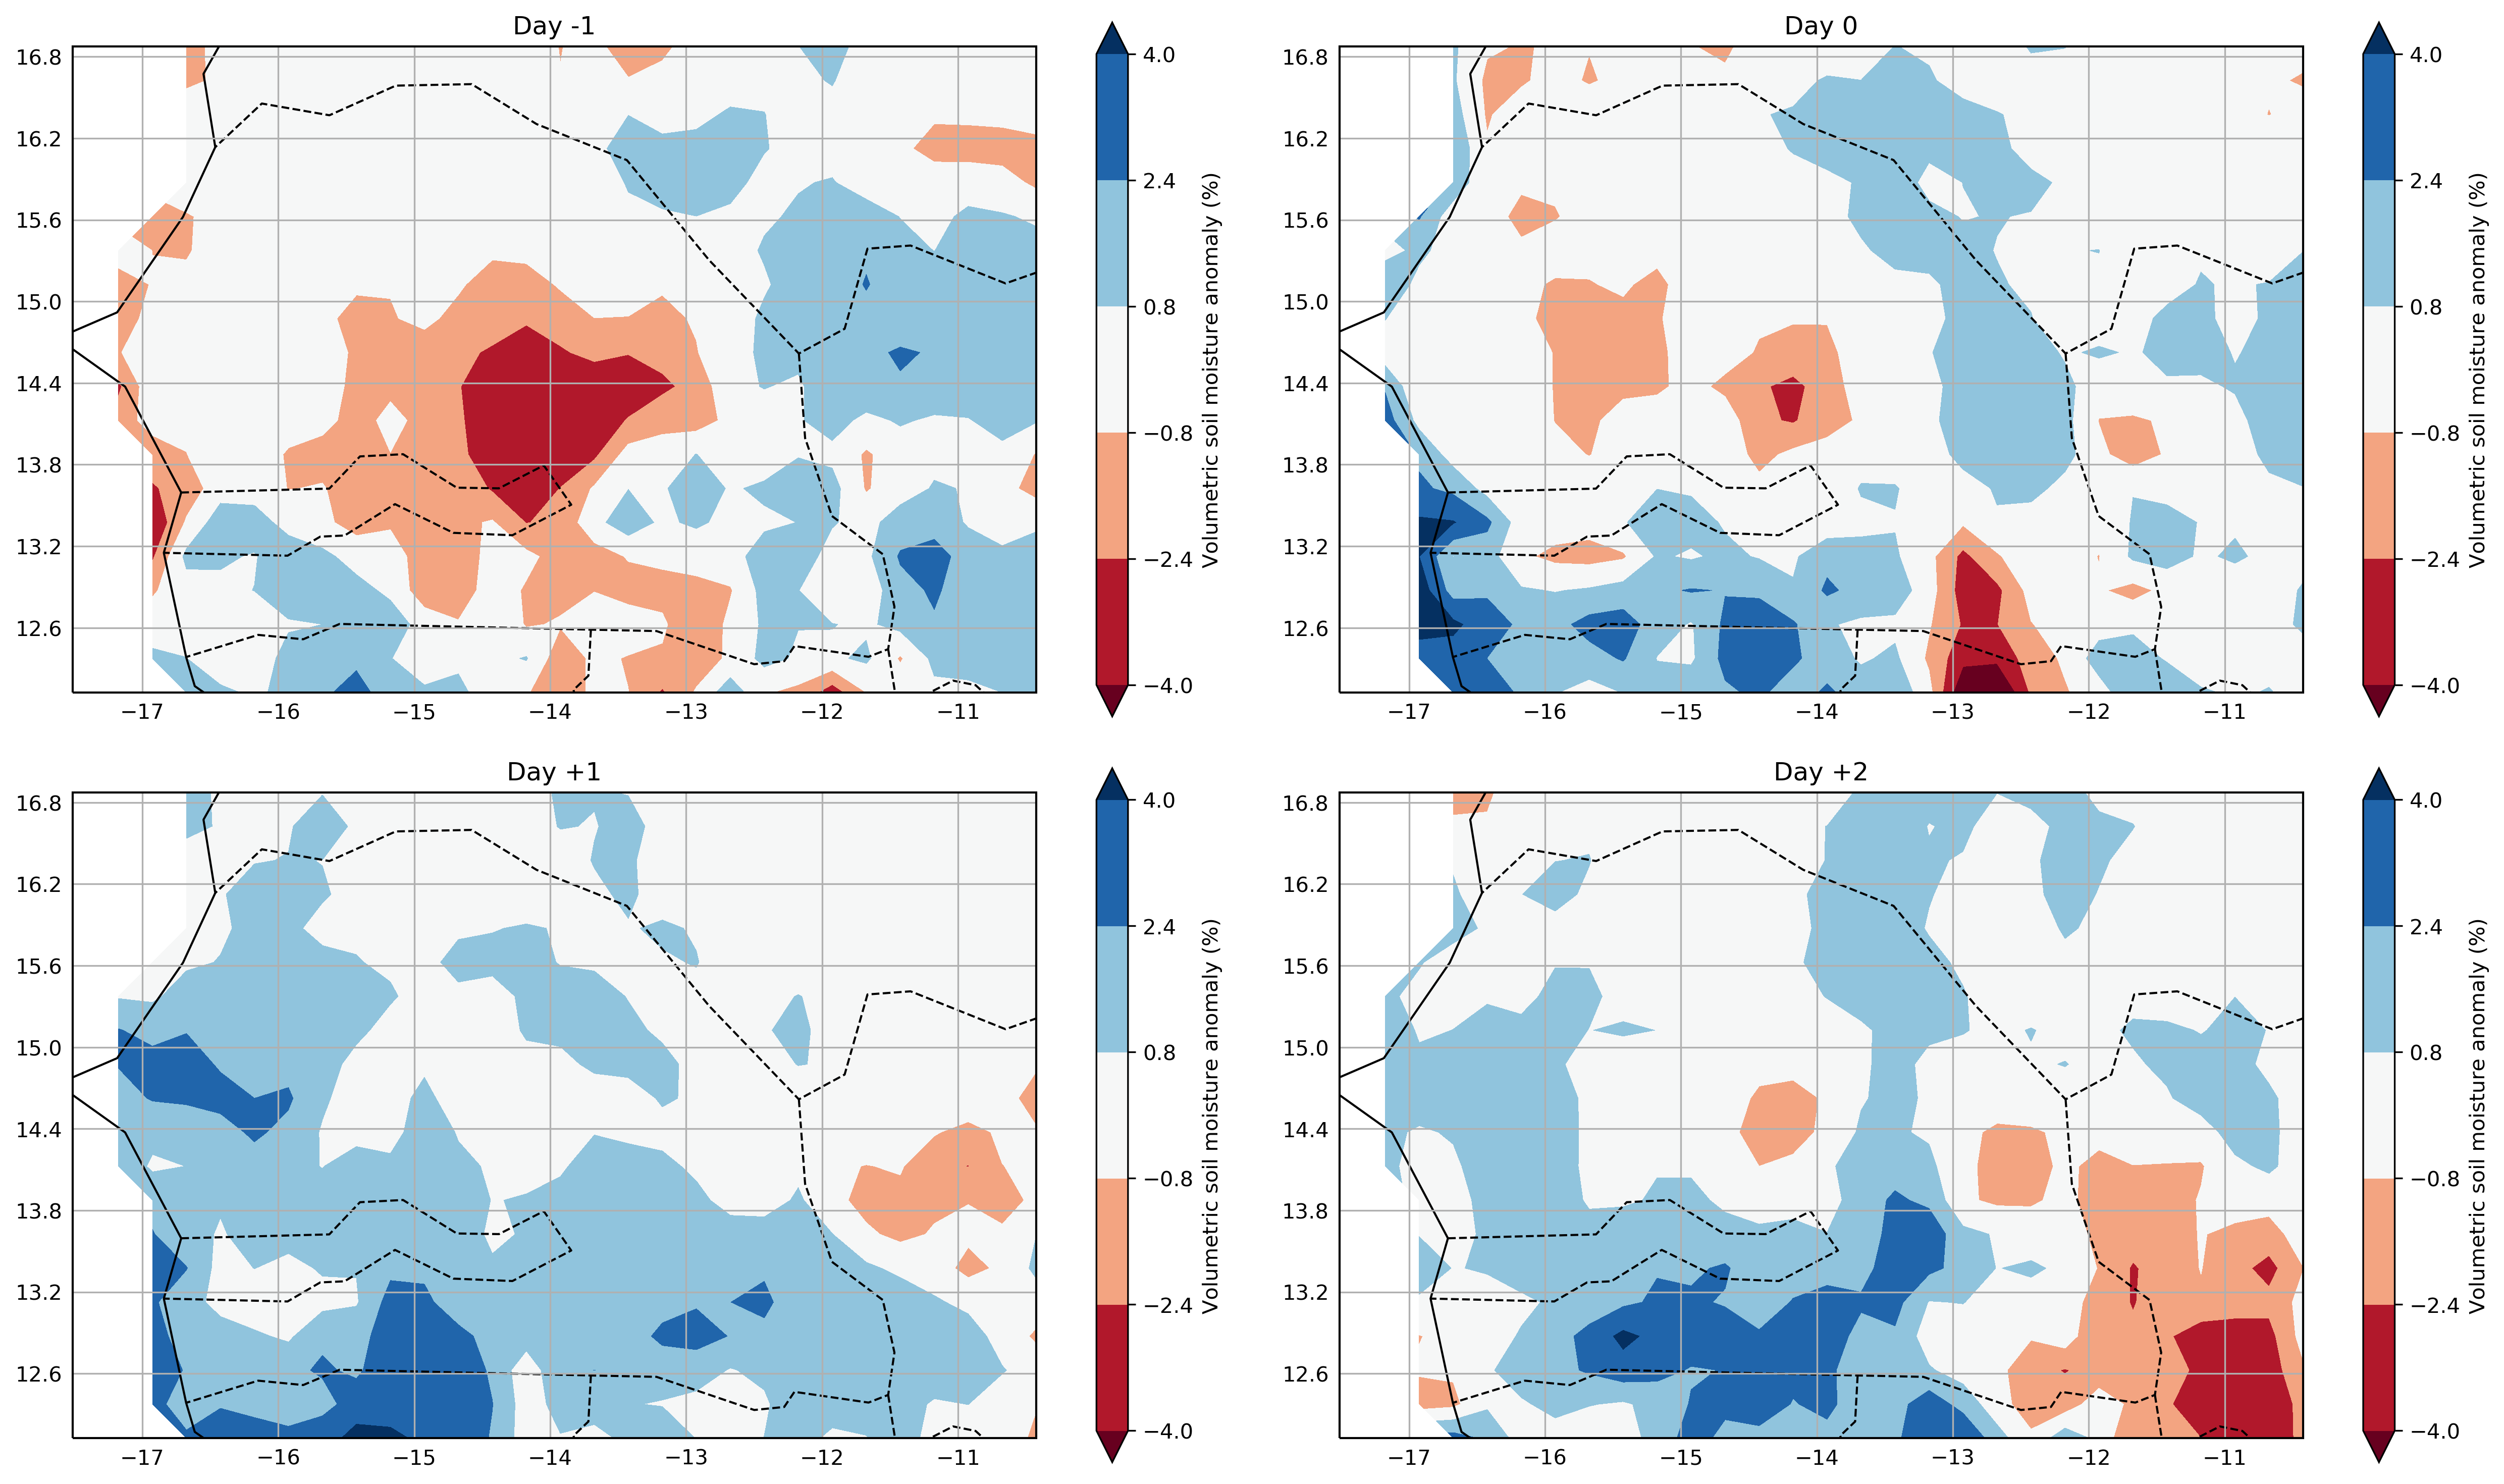

In [19]:
f = plt.figure(figsize=(17,10), dpi=300)

ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -1')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(0)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day 0')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +1')

ax = f.add_subplot(224, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(2)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +2')

f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/NFLICS_SManomaly_SMALL_daytime.png')

In [23]:
def run2(shift, day=True):

    kernel2_list = []
    kernel3_list = []
    cnt_list = []


    for date in tab.time:


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
        
        #ipdb.set_trace()
        fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)
        
        if day:
            try:
    
                lsta = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + fdate + '.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            except:
                continue

        else:
            try:
                lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + fdate + '.nc')
            except:
                continue
        

        lsta = lsta.sel(lon=slice(-19, -9), lat=slice(11, 17))     
        lsta = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day))




        lsta_da = lsta['SM'].squeeze()


        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')

        cnt = np.zeros_like(lsta_da.values)
        cnt[np.isfinite(lsta_da.values)] = 1

        kernel2_list.append(lsta_da.values)
        kernel3_list.append(lsta_da.values- np.nanmean(lsta_da.values))
        cnt_list.append(cnt) 

        lat = lsta.lat.values
        lon = lsta.lon.values
        
    ## t-test for equal means of past and current ensemble (based on a sample size of 4..not very robust..)
    tstat, pval = stats.ttest_ind(arstack_cur, arstack_past, axis=0) 
amask = (pval<=0.01).astype(int)  # test pvalue significance level at 0.01

    kernel2_sum = np.nansum(np.stack(kernel2_list, axis=0), axis=0)
    kernel3_sum = np.nansum(np.stack(kernel3_list, axis=0), axis=0)
    cnt_sum = np.nansum(np.stack(cnt_list, axis=0), axis=0)
    return kernel2_sum, kernel3_sum, cnt_sum, lsta_da

Doing AMSR_20040806.nc
Doing AMSR_20050818.nc
Doing AMSR_20050828.nc
Doing AMSR_20060723.nc
Doing AMSR_20060725.nc
Doing AMSR_20060811.nc
Doing AMSR_20060906.nc
Doing AMSR_20070716.nc
Doing AMSR_20070724.nc
Doing AMSR_20070801.nc
Doing AMSR_20070822.nc
Doing AMSR_20070905.nc
Doing AMSR_20070911.nc
Doing AMSR_20070916.nc
Doing AMSR_20080728.nc
Doing AMSR_20080806.nc
Doing AMSR_20080808.nc
Doing AMSR_20090807.nc
Doing AMSR_20090823.nc
Doing AMSR_20090827.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice


Doing AMSR_20100830.nc
Doing AMSR_20110802.nc
Doing AMSR_20110817.nc
Doing AMSR_20110911.nc
Doing AMSR_20120711.nc
Doing AMSR_20120825.nc
Doing AMSR_20120903.nc
Doing AMSR_20120905.nc
Doing AMSR_20120906.nc
Doing AMSR_20150724.nc
Doing AMSR_20150726.nc
Doing AMSR_20150821.nc
Doing AMSR_20150828.nc
Doing AMSR_20150922.nc
Doing AMSR_20150928.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice


Doing AMSR_20040807.nc
Doing AMSR_20050819.nc
Doing AMSR_20050829.nc
Doing AMSR_20060724.nc
Doing AMSR_20060726.nc
Doing AMSR_20060812.nc
Doing AMSR_20060907.nc
Doing AMSR_20070717.nc
Doing AMSR_20070725.nc
Doing AMSR_20070802.nc
Doing AMSR_20070823.nc
Doing AMSR_20070906.nc
Doing AMSR_20070912.nc
Doing AMSR_20070917.nc
Doing AMSR_20080729.nc
Doing AMSR_20080807.nc
Doing AMSR_20080809.nc
Doing AMSR_20090808.nc
Doing AMSR_20090824.nc
Doing AMSR_20090828.nc
Doing AMSR_20100831.nc
Doing AMSR_20110803.nc
Doing AMSR_20110818.nc
Doing AMSR_20110912.nc
Doing AMSR_20120712.nc
Doing AMSR_20120826.nc
Doing AMSR_20120904.nc
Doing AMSR_20120906.nc
Doing AMSR_20120907.nc
Doing AMSR_20150725.nc
Doing AMSR_20150727.nc
Doing AMSR_20150822.nc
Doing AMSR_20150829.nc
Doing AMSR_20150923.nc
Doing AMSR_20150929.nc
Doing AMSR_20040808.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice


Doing AMSR_20050820.nc
Doing AMSR_20050830.nc
Doing AMSR_20060725.nc
Doing AMSR_20060727.nc
Doing AMSR_20060813.nc
Doing AMSR_20060908.nc
Doing AMSR_20070718.nc
Doing AMSR_20070726.nc
Doing AMSR_20070803.nc
Doing AMSR_20070824.nc
Doing AMSR_20070907.nc
Doing AMSR_20070913.nc
Doing AMSR_20070918.nc
Doing AMSR_20080730.nc
Doing AMSR_20080808.nc
Doing AMSR_20080810.nc
Doing AMSR_20090809.nc
Doing AMSR_20090825.nc
Doing AMSR_20090829.nc
Doing AMSR_20100901.nc
Doing AMSR_20110804.nc
Doing AMSR_20110819.nc
Doing AMSR_20110913.nc
Doing AMSR_20120703.nc
Doing AMSR_20120713.nc
Doing AMSR_20120827.nc
Doing AMSR_20120905.nc
Doing AMSR_20120907.nc
Doing AMSR_20120908.nc
Doing AMSR_20150726.nc
Doing AMSR_20150823.nc
Doing AMSR_20150830.nc
Doing AMSR_20150924.nc
Doing AMSR_20150930.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


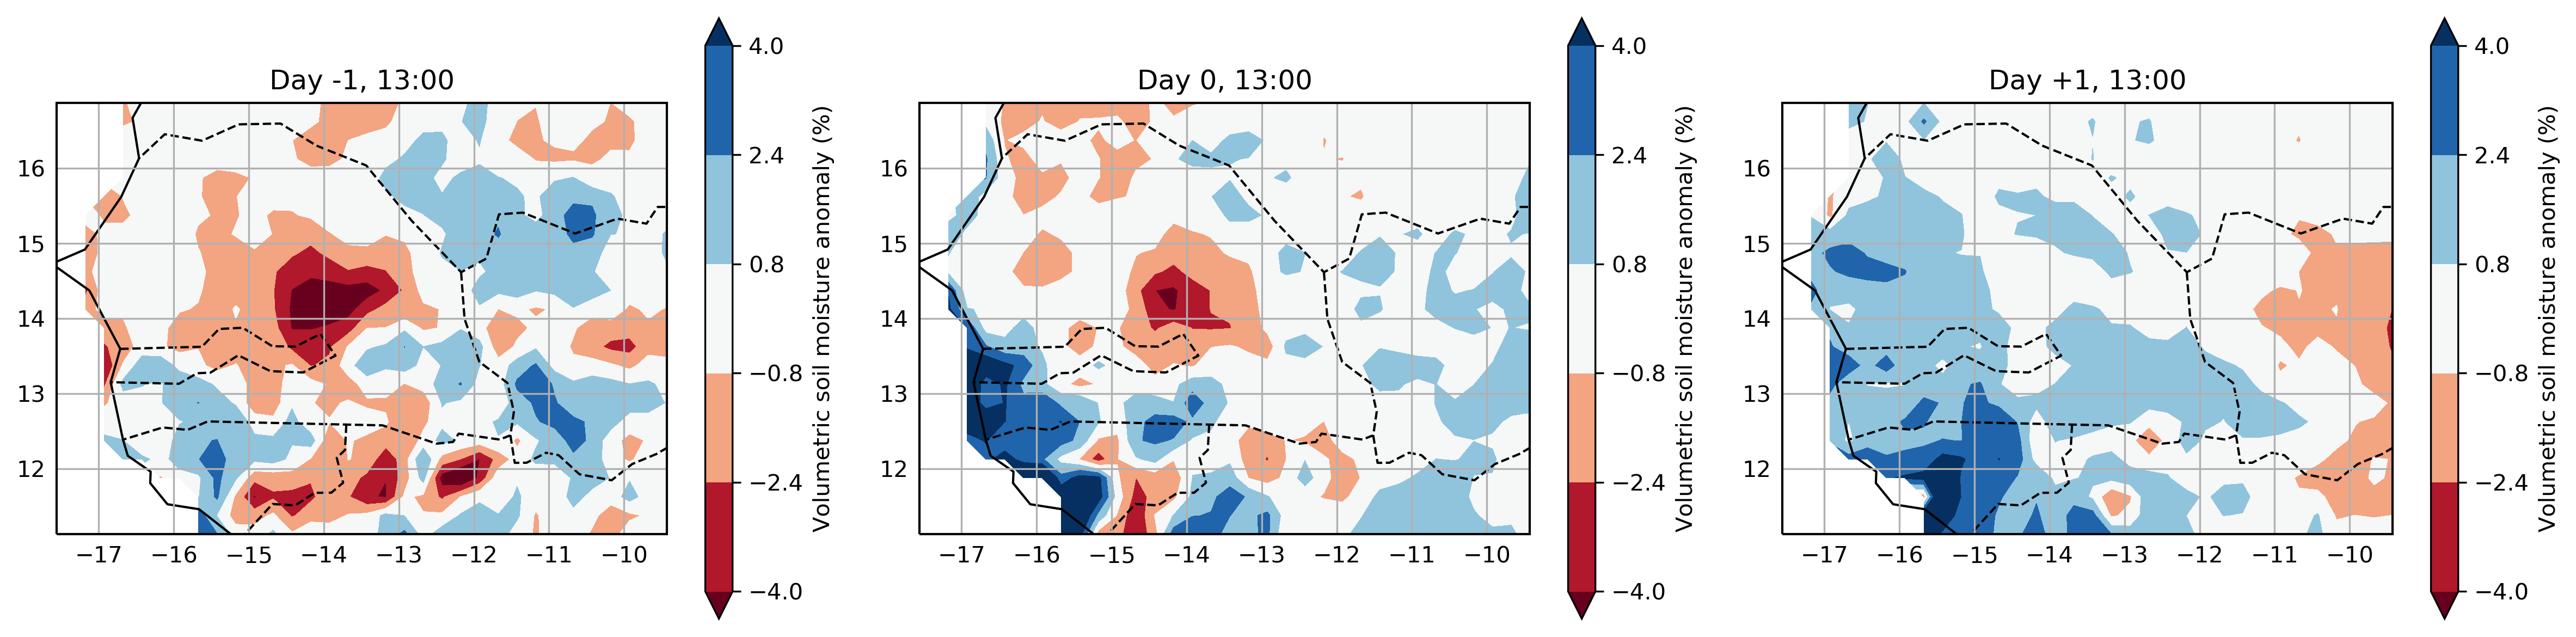

In [30]:
f = plt.figure(figsize=(16,4), dpi=300)

ax = f.add_subplot(131, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run2(-1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -1, 13:00')

ax = f.add_subplot(132, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run2(0)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day 0, 13:00')

ax = f.add_subplot(133, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run2(1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +1, 13:00')


f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/NFLICS_SManomaly_small_dayOnly.png')